In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import mizani as mz

#<font size="20+"> <font color="blue"> **Gráficos de Barra**</font>

**¿Qué es un Gráfico de Barra (barplot)?**

Los gráficos de barra o barplots son de los gráficos más utilizados. Nos permiten mostrar la relación entre una variable numérica y una categórica. 


#<font color="teal">**Datos mpg**</font>
Usaremos la siguiente base de datos para aprender a crear gráficos de barra:


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors


In [ ]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#<font color="teal">**Nuestro primer gráfico de barras**</font>

**¿Cuántos autos tienen transmisión de tipo automático vs manual?**

1. Los gráficos de barra nos permiten responder esta pregunta fácilmente de manera visual.
2. Para esto solo debemos graficar la variable categórica ``am`` que encondea el tipo de transmisión (0: automática, 1:manual) vs la variable númerica correspondiente al conteo de estas categorias.
3. Antes de graficar pre-procesaremos los datos para que la información sea más clara tanto como para nosotros, como para el lector y el computador. 

In [ ]:
#En este módulo reemplazamos los 0 y 1 por Automático y Manual respectivamente.
indice=mtcars["am"]==0
mtcars["am"][indice]="Automático"

indice=mtcars["am"]==1
mtcars["am"][indice]="Manual"

mtcars.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automático,3,2


**Nuestro primer gráfico de barras:**

Estamos casi listos para graficar la información requerida. Sin embargo, note que en nuestra base de datos no existe explícitamente una columna que tenga el número de autos con transmisión automática o  manual. Para solucionar esto hay dos opciones

## **Opcion 1:** 
- Nos creamos una tabla de frecuencias que contenga la información que queremos graficar. Para esto utilizamos **groupby()**

In [ ]:
tabla=mtcars["am"].groupby(mtcars["am"]).count()
tabla=pd.DataFrame({"am":tabla.index,"conteo":np.array(tabla)})
tabla.head()

,am,conteo
0,Automático,19
1,Manual,13


Graficamos utilizando el DataFrame **tabla** y el elemento geométrico **geom_bar()**. En aes() tenemos:
1. **x="am"** En el eje x asociamos el tipo de motor
2. **y="conteo"** En el eje y asociamos el valor del conteo
3. **fill="am"** pintamos según el tipo de transmisión

Finalmente **stat="identity"** nos indica que ggplot no tiene que pre-procesar los datos para contar el número de autos de cada tipo que hay. En general, siempre que el "eje y" este explicitamente asociado a una columna de nuestra base de datos, debemos usar esta opción en el barplot.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


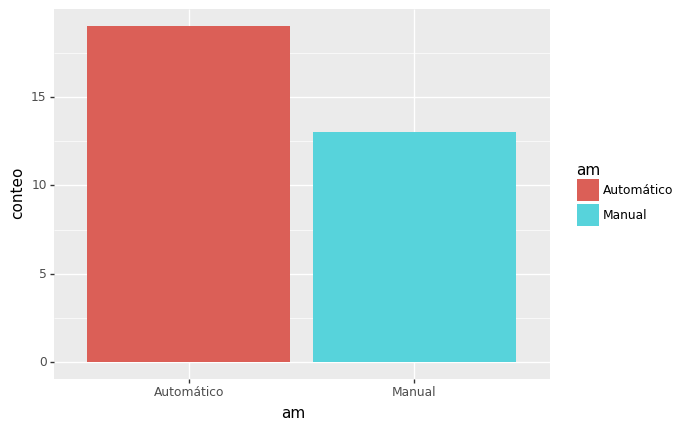

<ggplot: (8793851014709)>

In [ ]:
(ggplot(tabla)+
 aes(x="am",y="conteo",fill="am")+
 geom_bar(stat="identity") 
)

## **Opcion 2:** 
- Le decimos a ggplot que se encargue de contar por nosotros. Para esto utilizaremos el argumento **y="..count.."** que le indica al "eje y" que debe contar las frecuencias observadas para las categorias de la variable categorica asignada al "eje x".



/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


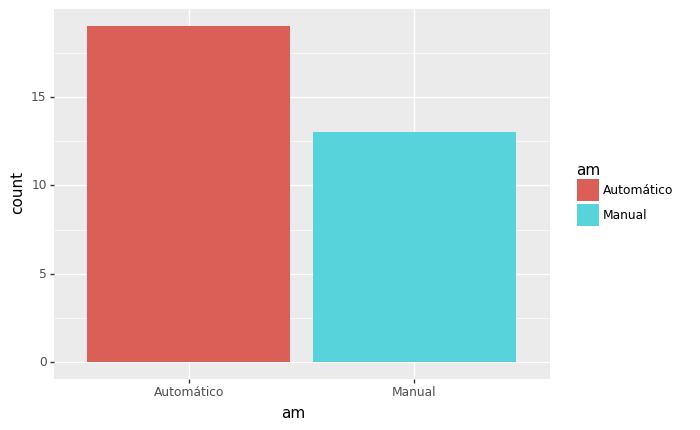

<ggplot: (8793851034825)>

In [ ]:
#Por ejemplo, aca graficamos el número de autos con transmisión automática vs manual. Note que al asignar fill="am" pintamos por el tipo de transmisión.
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="am")+
 geom_bar() 
)

En el caso de querer proporciones asignamos
- **y="..count../sum(..count..)"**: que normaliza las frecuencias obtenidas del eje x.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


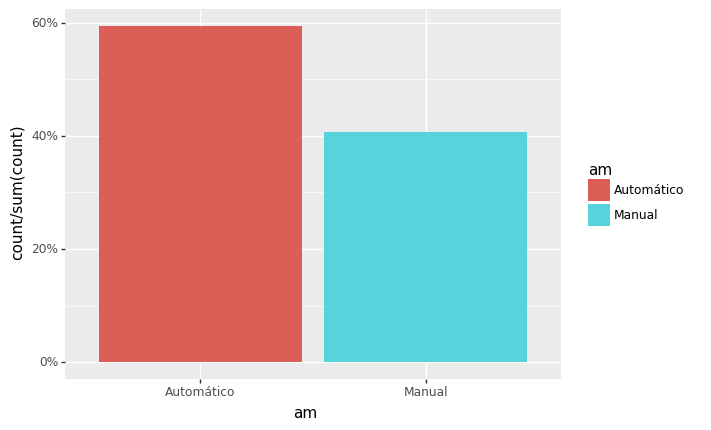

<ggplot: (8793851140545)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count../sum(..count..)",fill="am")+
 geom_bar()+
 scale_y_continuous(labels = mz.formatters.percent_format()) #Este comando transforma la escala del eje y a porcentajes. Usa el paquete mizani (mz)
)

#<font color="teal">**Utilizando 2 o más variables categóricas**</font>

Podemos utilizar los gráficos de barra para estudiar más de una variable categórica al mismo tiempo.

**Ejemplo:** consideremos la variable ``vs`` que denota el tipo de motor: (0:V-shaped, 1:Straight).

In [ ]:
#En este módulo reemplazamos los 0 y 1 por V-shaped y Straight respectivamente.
indice=mtcars["vs"]==0
mtcars["vs"][indice]="V-shaped"

indice=mtcars["vs"]==1
mtcars["vs"][indice]="Straight"

mtcars.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,Automático,3,2


El siguiente grafico nos permite ver facilmente cual es la distribución del tipo de motor para los diferentes tipos de transmisión (Automática vs Manual)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


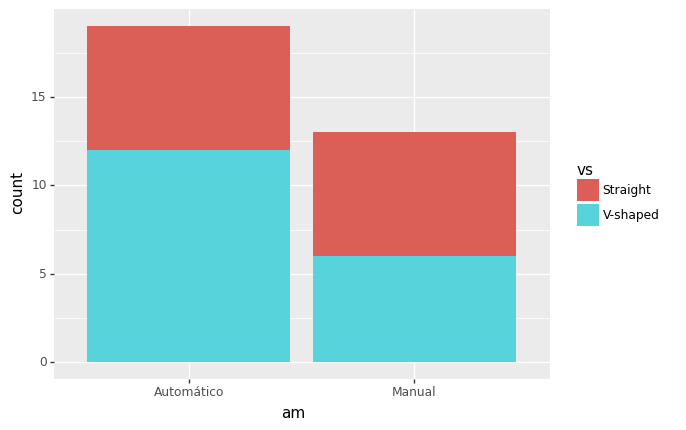

<ggplot: (8793851010789)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",fill="vs")+
 geom_bar(stat="count")
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


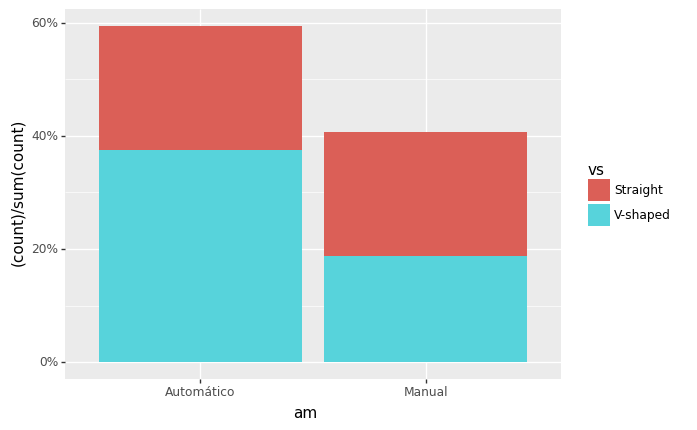

<ggplot: (8793851014289)>

In [ ]:
#Podemos ver lo mismo que antes, pero en término de proporciones
(ggplot(mtcars)+
 aes(x="am",y="(..count..)/sum(..count..)",fill="vs")+
 geom_bar()+
 scale_y_continuous(labels = mz.formatters.percent_format())
)



## **Posiciones para las barras.**
**ggplot** nos permite hacer 3 tipos de posiciones para las barras
1. **stack:** opción por defecto que divide la barra de acuerdo a la variable en fill
2. **dodge:** esta opción crea múltiples barras asociada a fill
3. **dodge2:** opción dodge pero las barras están más separadas.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


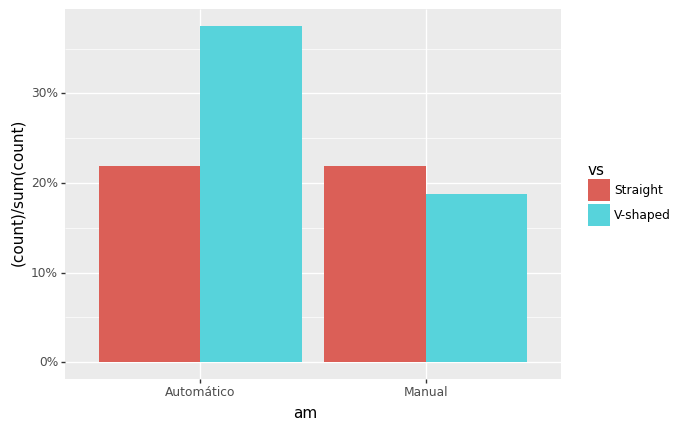

<ggplot: (8793851010685)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="(..count..)/sum(..count..)",fill="vs")+
 geom_bar(position="dodge")+
 scale_y_continuous(labels = mz.formatters.percent_format())
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


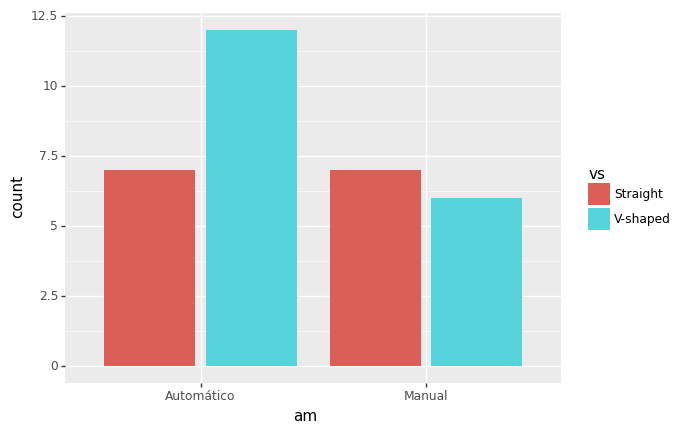

<ggplot: (8793851234781)>

In [ ]:

(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="vs")+
 geom_bar(position="dodge2")
)

**¿Cuál es la distribución del número de cilindros por tipo de auto: automático vs manual?**

- Note que la variable cyl es cuantitativa (discreta), pero para efectos del gráfico la tratamos con una variable categorica. 
- Para decirle a ggplot que cyl será trabajada como una variable categoria, utilizamos **factor(cyl)**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


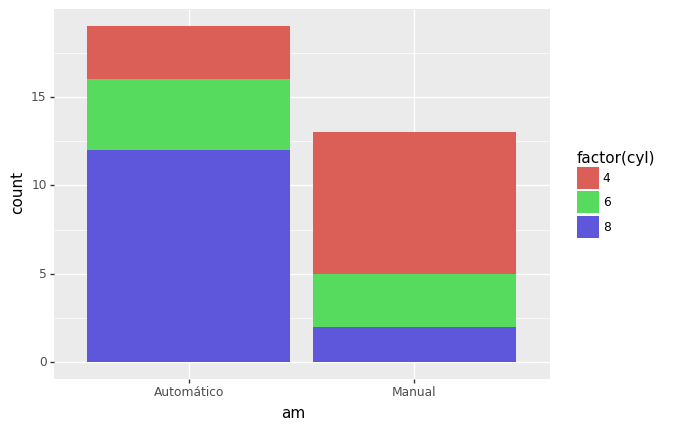

<ggplot: (8793850874453)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="factor(cyl)")+
 geom_bar()
)

**¿Cuál es la distribución del número de cilindros por tipo de auto (automático vs manual), y por tipo de motor (V-shaped vs Straight)?**

- Si queremos graficar más de una variable categórica podemos usar la opción **facet_wrap([variable3,variable4,...])** que separará en distintas ventanas.
- No abuse de esta opción, recuerde que menos es más.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


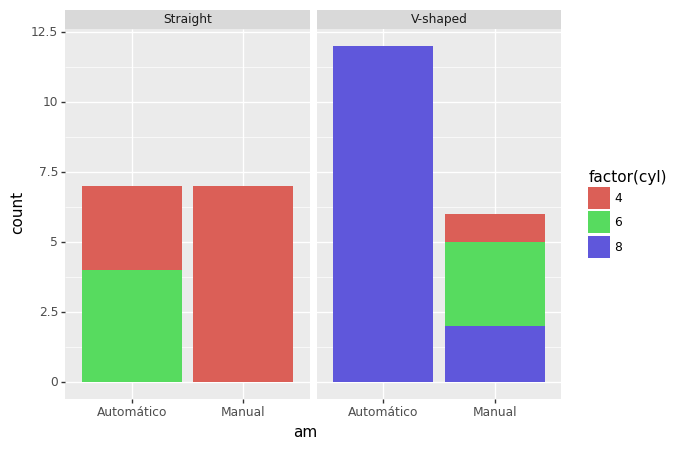

<ggplot: (8793851005521)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",fill="factor(cyl)")+
 geom_bar(stat="count",position="stack")+
 facet_wrap("vs")
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


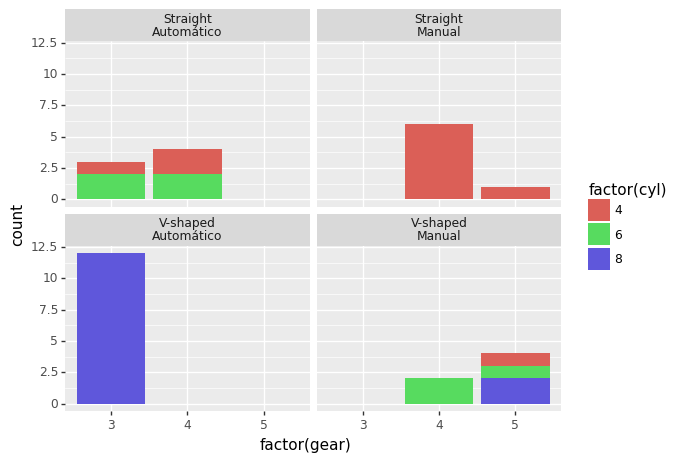

<ggplot: (8793851400721)>

In [ ]:
#Usamos facet_wrap con "vs" y "am"
(ggplot(mtcars)+
 aes(x="factor(gear)",fill="factor(cyl)")+
 geom_bar(stat="count",position="stack")+
 facet_wrap(["vs","am"]))

Si queremos crear nosotros mismos la tabla de frecuencia para replicar el gráfico anterior esto es posible usando el comando **groupby**

In [ ]:
##agrupamos por am, vs, gear y cyl, contando y guardando en la columna mpg.
aux=mtcars.groupby([mtcars["am"],mtcars["vs"],mtcars["gear"],mtcars["cyl"]],as_index = False)["mpg"].count()
aux.columns=["am", "vs", "gear", "cyl", "conteo"] #renombramos las columnas
aux.head()

,am,vs,gear,cyl,conteo
0,Automático,Straight,3,4,1
1,Automático,Straight,3,6,2
2,Automático,Straight,4,4,2
3,Automático,Straight,4,6,2
4,Automático,V-shaped,3,8,12


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


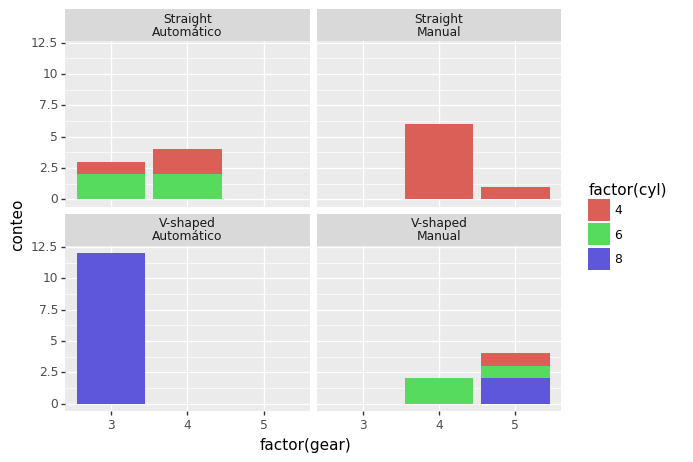

<ggplot: (8793851231269)>

In [ ]:
(ggplot(aux)
+aes(x = "factor(gear)", fill = "factor(cyl)", y = "conteo")
+ geom_bar(stat = "identity", position = "stack")
+ facet_wrap(["vs", "am"])
)

#<font color="teal">**Edición estética del gráfico de barras**</font>


Por ultimo estudiamos las opciones que nos entrega ggplot para editar nuestro gráfico.

## **Edición básica de un barplot**

Recordemos que los siguientes comandos agregan un título y nombre a los ejes x e y
1. **ggtitle("Mi titulo")**
2. **xlab("eje x")**
3. **ylab("eje y")**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 225 missing from current font.
  font.set_text(s, 0.0, flags=flags)


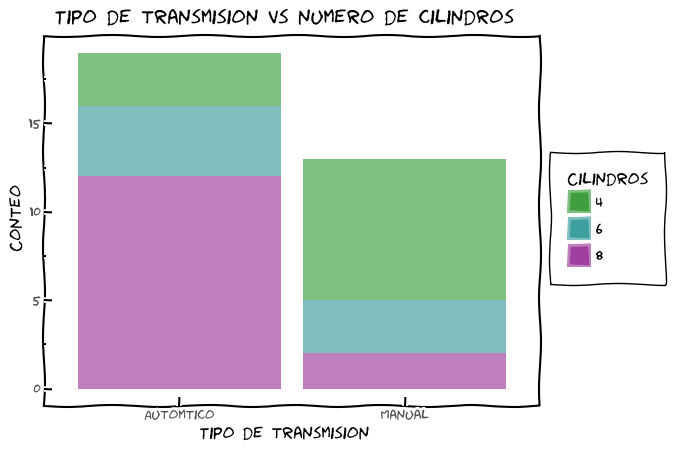

<ggplot: (8793851141629)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="factor(cyl)")+
 geom_bar(alpha=0.5)+
 theme_xkcd()+
 ggtitle("Tipo de transmision vs numero de cilindros")+
 xlab("Tipo de transmision")+
 ylab("Conteo")+
 scale_fill_manual(name="Cilindros",values=["green","teal","purple"])
)

4. En **geom_bar()**, el parámetro **alpha** controla la transparencia de los colores que usaremos.
5. Usando la opción **scale_fill_manual()** podemos controlar manualmente los colores que queremos usar en fill. Note que el número de colores que usamos tiene que ser igual al número de categorias de la variable que usamos en ``fill``.


## **scale_fill_brewer()**

1. Si somos malos eligiendo colores para ``fill``, podemos usar algunos por defectos que vienen con la opción scale_fill_brewer().
2. Para obtener distintas paletas de colores, podemos usar el argumento **palette="opción"** para elegir una paleta pre-hecha. Podemos probar distintas opciones usando diferentes números, o podemos algunas de las siguientes opciones:

Blues, BuGn, BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu, YlOrBr, YlOrRd.

3. Si quieren aprender más sobre paletas, por ejemplo, si queremos saber cuales son mejores para imprimir en blanco y negro, o para personas daltónicas , visite 
https://colorbrewer2.org/
4. Por último, note que ya sea que usemos la opción scale_fill_manual o scale_fill_brewer, el nombre que le entreguemos a esta función modificara el nombre de la leyenda.



/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


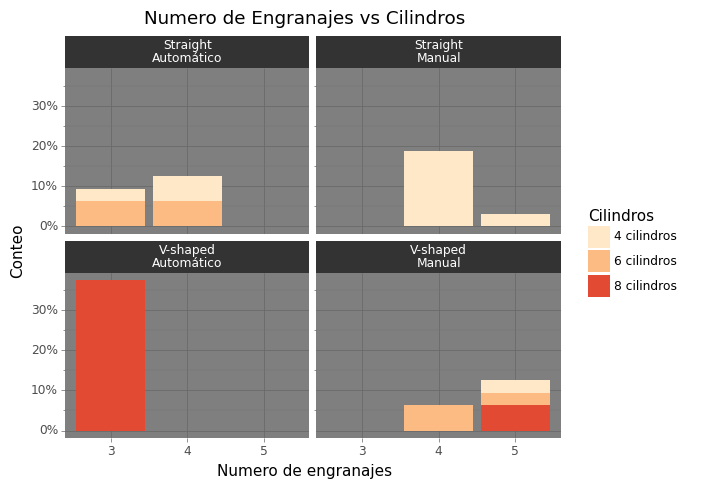

<ggplot: (8793851402945)>

In [ ]:
#Usamos facet_wrap con "vs" y "am"
(ggplot(mtcars)+
 aes(x="factor(gear)",y="..count../sum(..count..)",fill="factor(cyl)")+
 geom_bar(position="stack")+
  scale_y_continuous(labels = mz.formatters.percent_format())+
 facet_wrap(["vs","am"],ncol=2)+
 theme_dark()+
 ggtitle("Numero de Engranajes vs Cilindros")+
 xlab("Numero de engranajes")+
 ylab("Conteo")+
 scale_fill_brewer(name="Cilindros",palette=7,labels=["4 cilindros","6 cilindros","8 cilindros"]) #usando la función labels podemos modificar las etiquetas de la leyenda
 
 )